In [153]:
import numpy as np, pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#sklearn_pandas.CategoricalImputer

os.chdir("E:/2. Kaggle/Housing prices/home-data-for-ml-course")

In [154]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [155]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
df_train.shape

(1460, 81)

In [157]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [158]:
df_train.isnull().sum() > 0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

### 3. EDA

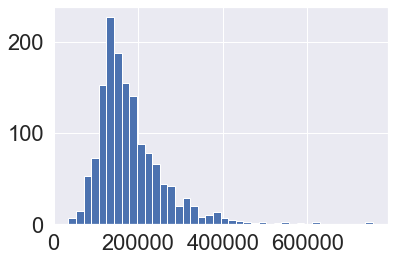

In [159]:
#histogram
df_train['SalePrice'].hist(bins = 40)

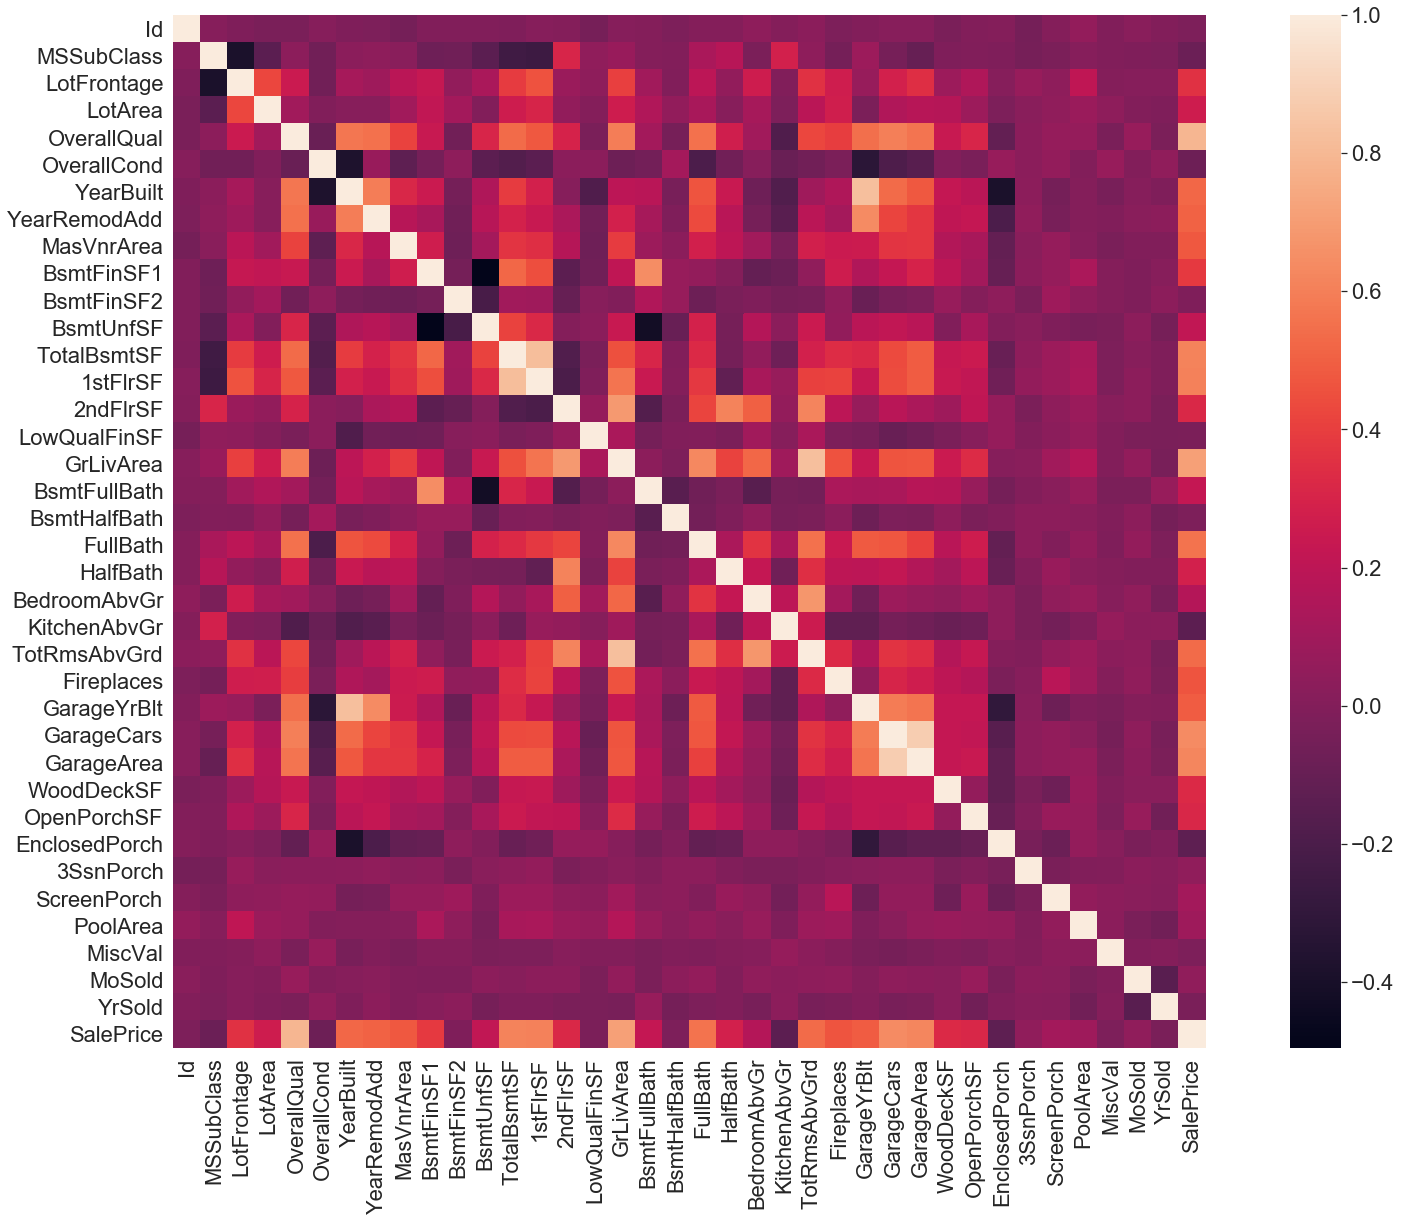

In [160]:
cor_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=2)
sns.heatmap(cor_matrix,square = True)

In [161]:
features = cor_matrix.SalePrice.sort_values(ascending = False)[1:10].index

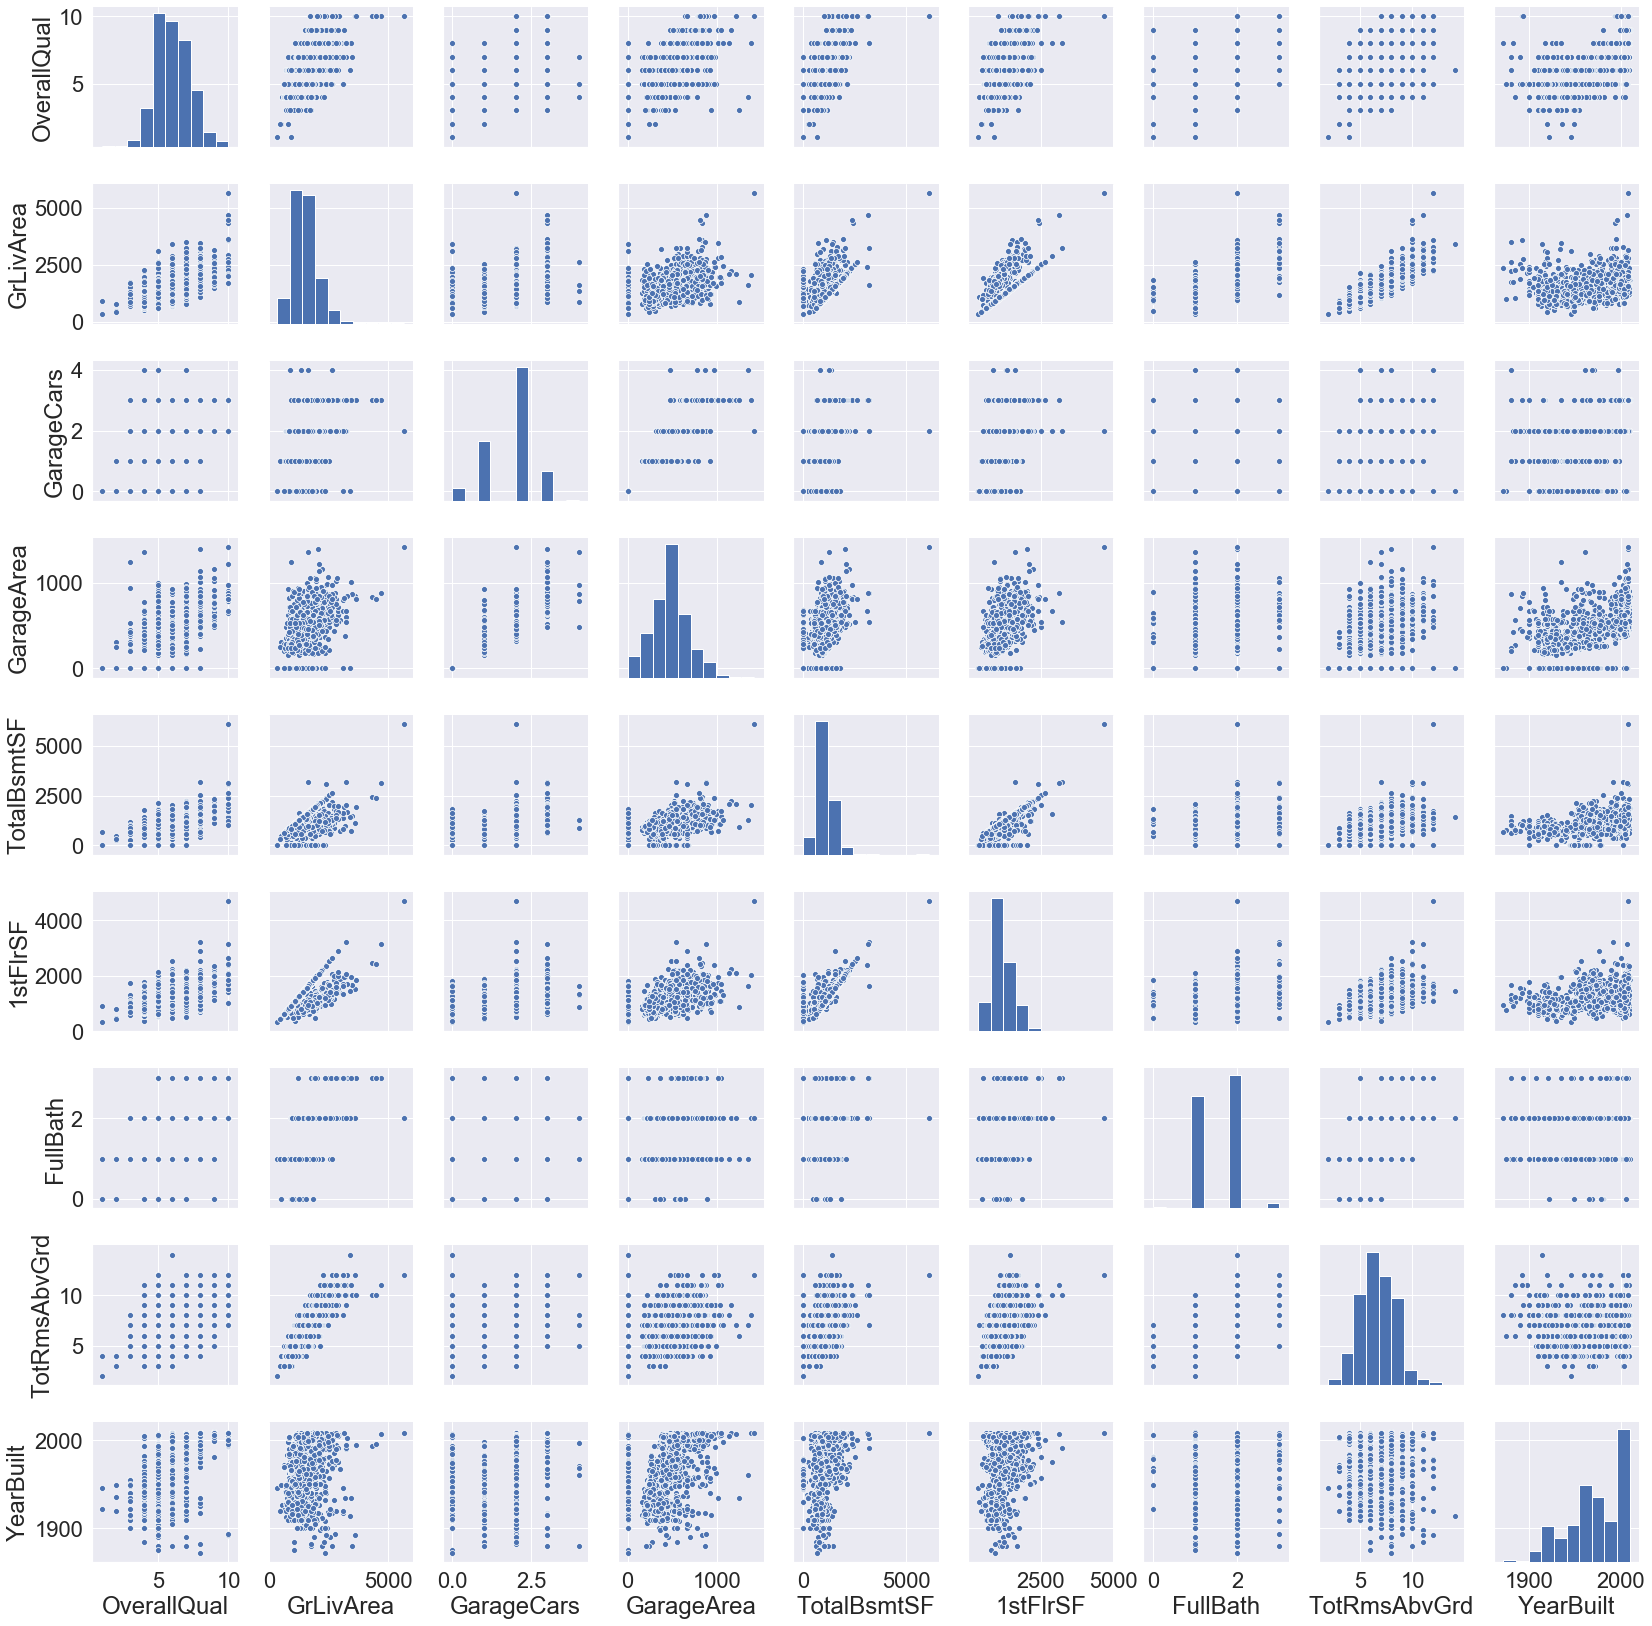

In [162]:
sns.pairplot(df_train[features])
plt.show()

In [163]:
df_train = df_train.drop(['Id'], axis=1)
df_test = df_test.drop(['Id'], axis = 1)

In [164]:
testing_null = pd.isnull(df_test).sum()
training_null = pd.isnull(df_train).sum()

In [165]:
null = pd.concat([testing_null,training_null],axis = 1, keys = ["testing","training"])
null

,testing,training
MSSubClass,0.0,0
MSZoning,4.0,0
LotFrontage,227.0,259
LotArea,0.0,0
Street,0.0,0
...,...,...
MoSold,0.0,0
YrSold,0.0,0
SaleType,1.0,0
SaleCondition,0.0,0


In [166]:
#Based on the description data file provided, all the variables who have meaningfull Nan

null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [167]:
for i in null_with_meaning:
    df_train[i].fillna("None",inplace = True)
    df_test[i].fillna("None",inplace = True)

In [168]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values
null_many

,testing,training
LotFrontage,227.0,259
Alley,1352.0,1369
FireplaceQu,730.0,690
PoolQC,1456.0,1453
Fence,1169.0,1179
MiscFeature,1408.0,1406


In [173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [174]:
df_train.drop("LotFrontage", axis=1, inplace=True)
df_test.drop("LotFrontage", axis=1, inplace=True)

KeyError: "['LotFrontage'] not found in axis"

In [175]:
#I chose to use the mean function for replacement
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)
#data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)

df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)
#data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

df_train["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrType"].fillna("None", inplace=True)
#data["MasVnrType"].fillna("None", inplace=True)

In [176]:
types_train = df_train.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = df_test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

### Numerical Imputation

In [177]:
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)

fill_num = numerical_values_train + numerical_values_test
print(fill_num)

['MasVnrArea', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [178]:
for i in fill_num:
    df_train[i].fillna(df_train[i].mean(),inplace = True)
    df_test[i].fillna(df_test[i].mean(),inplace = True)

### Categorical Imputation

In [179]:
df_train.shape, df_test.shape

((1460, 79), (1459, 78))

In [180]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [181]:
fill_cat = []

for i in categorical_values_train:
    if i in list(null_few.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [182]:
def most_common_term(data,feature):
    return data[feature].value_counts().index[0]


In [183]:
most_common = []

for i in fill_cat:
    most_common.append(most_common_term(df_train,i))
    
most_common

['RL',
 'AllPub',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'SBrkr',
 'TA',
 'Typ',
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'WD']

In [184]:
k = 0
for i in fill_cat:
    df_train.fillna(most_common[k], inplace=True)
    df_test.fillna(most_common[k], inplace=True)
    k += 1

In [185]:
df_train.isnull().sum().sum()

0

In [186]:
df_test.isnull().sum().sum()

0

### 4. Feature Engineering

#### Sales price is skewed. So apply log transform

In [187]:
df_train["log_sales_price"] = df_train["SalePrice"].apply(lambda x: np.log(x))

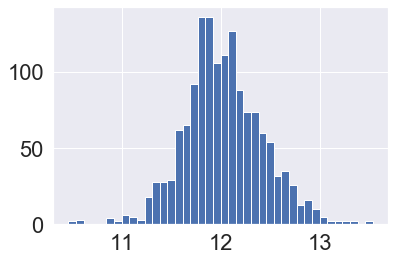

In [188]:
df_train["log_sales_price"].hist(bins = 40)

In [189]:
df_train_add = df_train.copy()

df_train_add['TotalSF']=df_train_add['TotalBsmtSF'] + df_train_add['1stFlrSF'] + df_train_add['2ndFlrSF']

df_train_add['Total_Bathrooms'] = (df_train_add['FullBath'] + (0.5 * df_train_add['HalfBath']) +
                               df_train_add['BsmtFullBath'] + (0.5 * df_train_add['BsmtHalfBath']))

df_train_add['Total_porch_sf'] = (df_train_add['OpenPorchSF'] + df_train_add['3SsnPorch'] +
                              df_train_add['EnclosedPorch'] + df_train_add['ScreenPorch'] +
                              df_train_add['WoodDeckSF'])

df_test_add = df_test.copy()

df_test_add['TotalSF']=df_test_add['TotalBsmtSF'] + df_test_add['1stFlrSF'] + df_test_add['2ndFlrSF']

df_test_add['Total_Bathrooms'] = (df_test_add['FullBath'] + (0.5 * df_test_add['HalfBath']) +
                               df_test_add['BsmtFullBath'] + (0.5 * df_test_add['BsmtHalfBath']))

df_test_add['Total_porch_sf'] = (df_test_add['OpenPorchSF'] + df_test_add['3SsnPorch'] +
                              df_test_add['EnclosedPorch'] + df_test_add['ScreenPorch'] +
                              df_test_add['WoodDeckSF'])

In [190]:
## For ex, if PoolArea = 0 , Then HasPool = 0 too

df_train_add['haspool'] = df_train_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['has2ndfloor'] = df_train_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasgarage'] = df_train_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasbsmt'] = df_train_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasfireplace'] = df_train_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

df_test_add['haspool'] = df_test_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['has2ndfloor'] = df_test_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasgarage'] = df_test_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasbsmt'] = df_test_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasfireplace'] = df_test_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [191]:
df_train[df_train["SalePrice"] > 600000 ] #Discovering the outliers

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_sales_price
691,60,RL,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,None,0,1,2007,WD,Normal,755000,13.534473
898,20,RL,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,3,2010,New,Partial,611657,13.323927
1169,60,RL,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,...,None,None,None,0,7,2006,WD,Normal,625000,13.345507
1182,60,RL,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000,13.521139


In [192]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [196]:
for i in categorical_values_train:
    feature_set = set(df_train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df_train.loc[df_train[i] == j, i] = feature_list.index(j)
        df_train_add.loc[df_train[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(df_test[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        df_test.loc[df_test[i] == j, i] = feature_list2.index(j)
        df_test_add.loc[df_test[i] == j, i] = feature_list2.index(j)

In [197]:
df_train_add.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,log_sales_price,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,60,4,8450,0,2,2,1,1,4,2,...,208500,12.247694,2566,3.5,61,0,1,1,1,0
1,20,4,9600,0,2,2,1,1,0,2,...,181500,12.109011,2524,2.5,298,0,0,1,1,1
2,60,4,11250,0,2,3,1,1,4,2,...,223500,12.317167,2706,3.5,42,0,1,1,1,1
3,70,4,9550,0,2,3,1,1,2,2,...,140000,11.849398,2473,2.0,307,0,1,1,1,1
4,60,4,14260,0,2,3,1,1,0,2,...,250000,12.429216,3343,3.5,276,0,1,1,1,1


In [198]:
df_test_add.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,20,0,11622,0,2,2,1,1,4,2,...,3,0,1778.0,1.0,260,0,0,1,1,0
1,20,4,14267,0,2,3,1,1,2,2,...,3,0,2658.0,1.5,429,0,0,1,1,0
2,60,4,13830,0,2,3,1,1,4,2,...,3,0,2557.0,2.5,246,0,1,1,1,1
3,60,4,9978,0,2,3,1,1,4,2,...,3,0,2530.0,2.5,396,0,1,1,1,1
4,120,4,5005,0,2,3,0,1,4,2,...,3,0,2560.0,2.0,226,0,0,1,1,0


In [199]:
df_train_add.dtypes

MSSubClass       int64
MSZoning        object
LotArea          int64
Street          object
Alley           object
                 ...  
haspool          int64
has2ndfloor      int64
hasgarage        int64
hasbsmt          int64
hasfireplace     int64
Length: 88, dtype: object

In [200]:
#df_train_add = df_train_add.astype('int64')
#df_test_add = df_test_add.astype('int64')

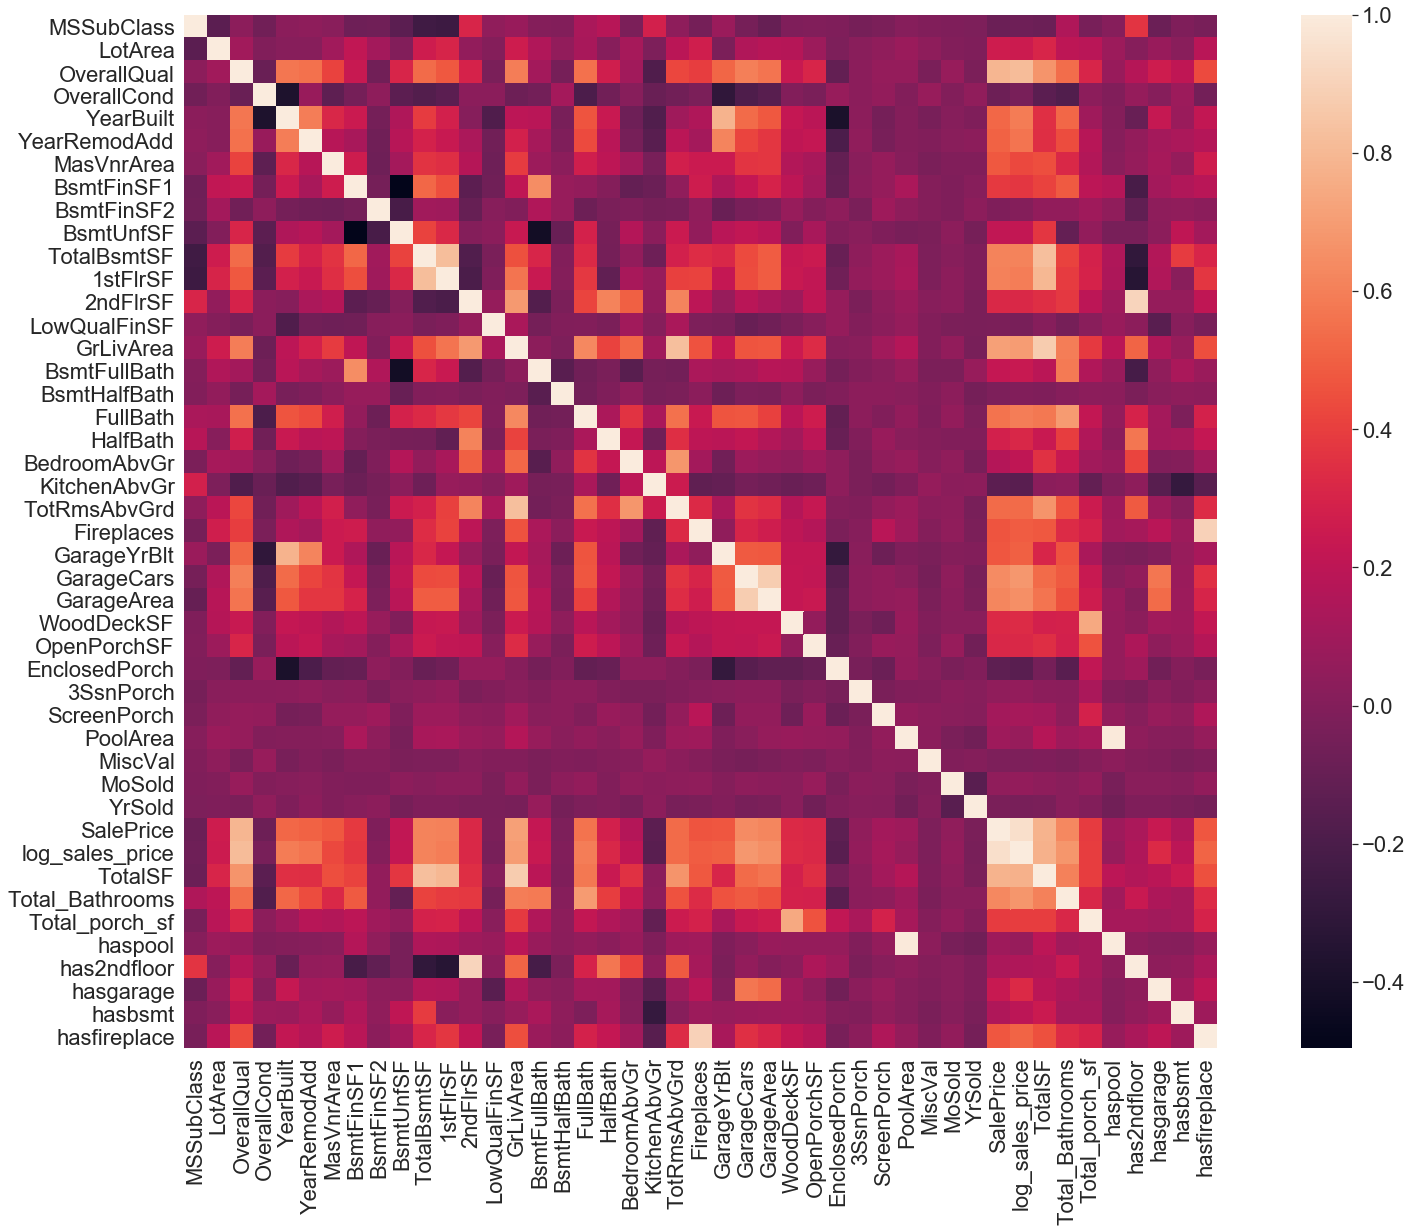

In [201]:
cor_matrix = df_train_add.corr()
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=2)
sns.heatmap(cor_matrix,square = True)

In [202]:
features = cor_matrix.SalePrice.sort_values(ascending = False)[1:10].index

In [203]:
cor_matrix.SalePrice.sort_values(ascending = False)

SalePrice          1.000000
log_sales_price    0.948374
OverallQual        0.790982
TotalSF            0.782260
GrLivArea          0.708624
GarageCars         0.640409
Total_Bathrooms    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
YearRemodAdd       0.507101
MasVnrArea         0.475241
hasfireplace       0.471908
GarageYrBlt        0.470177
Fireplaces         0.466929
Total_porch_sf     0.390993
BsmtFinSF1         0.386420
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
LotArea            0.263843
hasgarage          0.236832
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
hasbsmt            0.152829
has2ndfloor        0.137656
ScreenPorch        0.111447
haspool            0.093708
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0

### 6. ML Models

In [204]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [205]:
X_train = df_train_add.drop(["SalePrice","log_sales_price"], axis=1)
y_train = df_train_add["log_sales_price"]

In [206]:
from sklearn.model_selection import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(X_train,y_train,test_size = 0.2, random_state=0)

### Linear Regression Model

### Adding GridSearchCV Function

In [207]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose = 1, scoring = "r2")
grid_linreg.fit(X_training,y_training)

print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 0.8754740240877179


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [208]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.7447961789794583
RMSE Score: 0.19656504814228679


In [209]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, lin_pred))
print('MSE:', metrics.mean_squared_error(y_valid, lin_pred))

MAE: 0.09943653566307928
MSE: 0.038637818151179525


In [210]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8718045944141869


### Ridge Model

In [211]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.880046714113093


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [212]:

ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7154839052346802
RMSE Score: 0.20754684233072354


In [213]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.877653904714214


### Xgboost

In [229]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=20000,
                       max_depth=3, 
                       min_child_weight=0,
                       gamma=0, 
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', 
                       nthread=-1,
                       scale_pos_weight=1, 
                       seed=27,
                       reg_alpha=0.006)


In [230]:
xgb = xgboost.fit(X_training.select_dtypes([np.number]), y_training)

[00:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [232]:
xgb_pred = xgb.predict(X_valid.select_dtypes([np.number]))
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.8928743003445764
RMSE Score: 0.12735310749936252


array([11.722463, 12.007136, 12.164607, ..., 12.12617 , 11.605397,
       12.337862], dtype=float32)

In [236]:
submission_predictions = np.exp(xgb.predict(df_test_add.select_dtypes([np.number])))
print(submission_predictions)

[123310.73 163920.42 191876.47 ... 184641.27 109688.22 228173.6 ]


In [239]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = df_test.index + 1461
res['SalePrice'] = submission_predictions
res.to_csv('submission1.csv',index=False)

RangeIndex(start=0, stop=1459, step=1)